# Stock Prices Prediction Using Keras Long Short Term Memory (LSTM) Model

## Part 1 : Data Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Importing the training data
train = pd.read_csv('/content/drive/MyDrive/GEN AI/DL/NSE-TATAGLOBAL.csv')
train_set = train.iloc[:, 1:2].values

In [3]:
train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


### Data Visulization

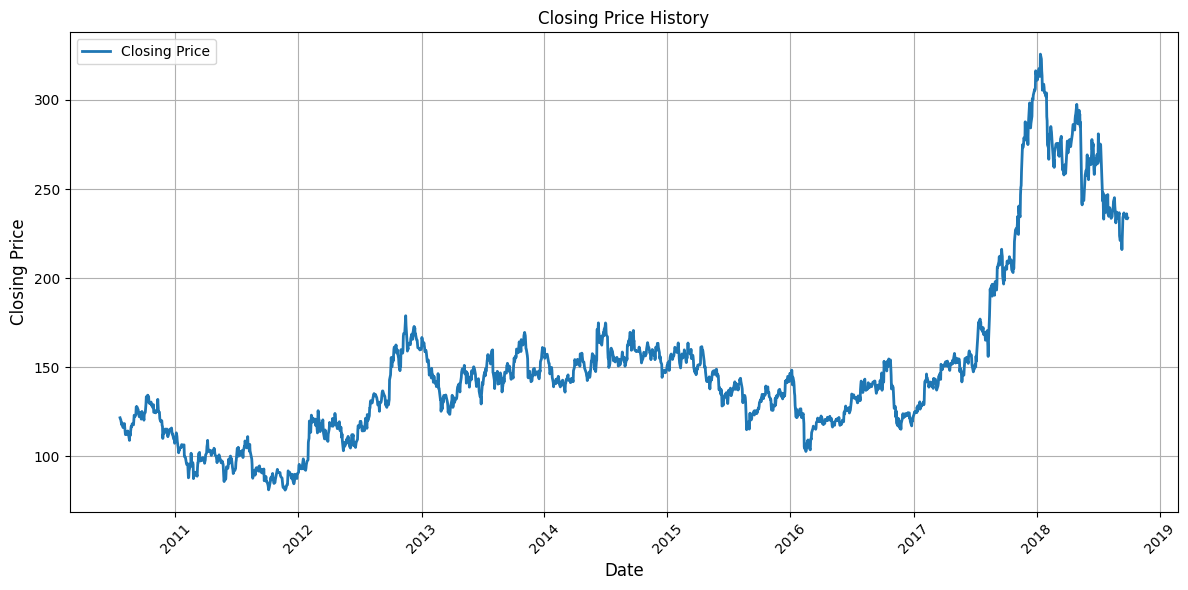

In [4]:
# Line plot for Closing Prices
train['Data'] = pd.to_datetime(train['Date'])
train.set_index('Data', inplace = True)

plt.figure(figsize=(12,6))
plt.plot(train.index, train['Close'], linewidth = 2, label = 'Closing Price')
plt.title('Closing Price History')
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Closing Price', fontsize = 12)
plt.legend()
plt.grid(True)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

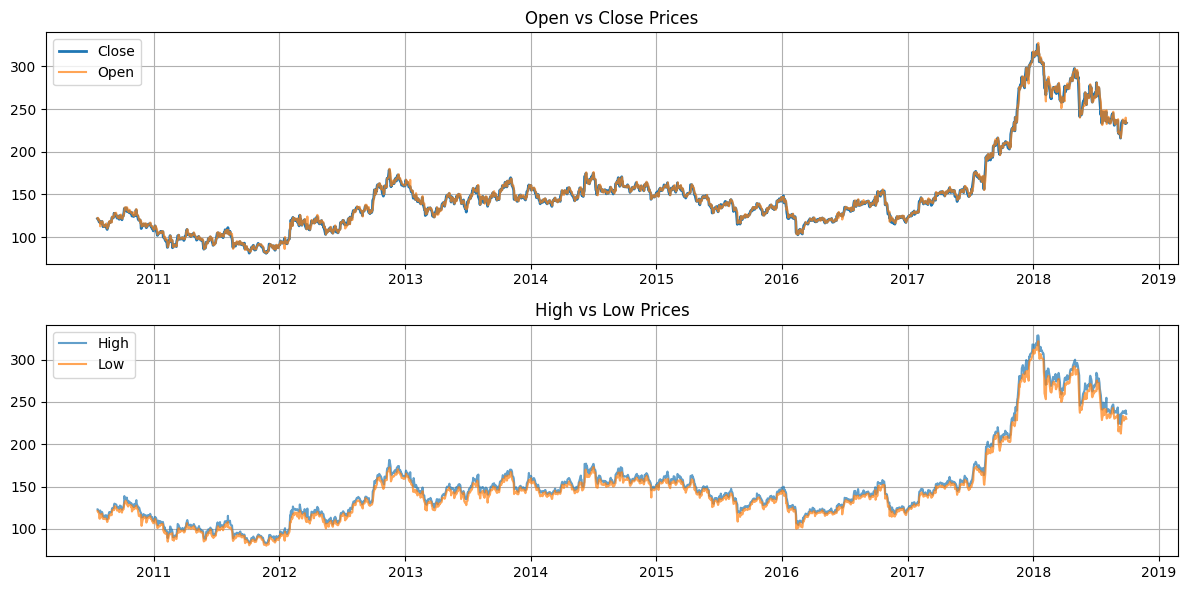

In [5]:
# OHLC Chart (Open, High, Low, Close)
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(train.index, train['Close'],label = 'Close', linewidth=2 )
plt.plot(train.index, train['Open'], label = "Open",alpha = 0.7)
plt.title("Open vs Close Prices")
plt.legend()
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(train.index, train['High'], label= "High", alpha=0.7)
plt.plot(train.index, train['Low'], label = "Low", alpha = 0.7)
plt.title("High vs Low Prices")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

###  Feature scaling

In [6]:
train.shape

(2035, 8)

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
train_set_scaled = sc.fit_transform(train_set)

In [8]:
train_set_scaled.shape

(2035, 1)

In [9]:
# Creating a data structure with 60 timestamp and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
  X_train.append(train_set_scaled[i-60:i, 0])
  y_train.append(train_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
train.shape

(2035, 8)

In [11]:
X_train.shape

(1198, 60)

In [12]:
X_train.shape[0]

1198

In [13]:
X_train.shape[1]

60

In [14]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

In [15]:
X_train.shape

(1198, 60, 1)

## Part 2: Building the RNN

In [16]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [17]:
input_shape = (X_train.shape[1], 1)

In [18]:
input_shape

(60, 1)

In [19]:
input_shape[0]

60

In [20]:
# Initilising the RNN
regressor = Sequential()

# units : 50, 100, 200, 256, 512, 1024
# Adding the first LSTM layer and some Dropout regularisatin
regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
# Adding second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [22]:
# Adding third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [23]:
# Adding fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
# regressor.add(Dropout(0.2))

In [24]:
from keras import metrics

# Adding the output layer
regressor.add(Dense(units = 1))

# Compile the RNN
regressor.compile(optimizer = 'rmsprop',
                  loss = 'mean_squared_error',
                  metrics = [metrics.MeanAbsoluteError(), metrics.RootMeanSquaredError()])

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step - loss: 0.0295 - mean_absolute_error: 0.1238 - root_mean_squared_error: 0.1648
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - loss: 0.0063 - mean_absolute_error: 0.0558 - root_mean_squared_error: 0.0786
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0062 - mean_absolute_error: 0.0588 - root_mean_squared_error: 0.0782
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0042 - mean_absolute_error: 0.0473 - root_mean_squared_error: 0.0644
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - loss: 0.0033 - mean_absolute_error: 0.0419 - root_mean_squared_error: 0.0574
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0043 - mean_absolute_error: 0.0484 - root_mean_squared_error: 0.0653
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - loss: 0.0031 - mean_absolute_error: 0.0398 - root_mean_squared_error: 0.0553
Epoch 8/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - loss: 0.0033 - mean_absolute

In [25]:
### Part 3: Making the predictions and visualising the result

# Getting the real stock prics of 2017
test = pd.read_csv('/content/drive/MyDrive/GEN AI/DL/tatatest.csv')
real_stock_price = test.iloc[:, 1:2].values

In [26]:
test.shape

(16, 8)

In [27]:
real_stock_price

array([[220.1 ],
       [221.1 ],
       [229.45],
       [230.3 ],
       [237.7 ],
       [237.1 ],
       [229.7 ],
       [226.25],
       [215.  ],
       [215.  ],
       [215.5 ],
       [208.  ],
       [217.  ],
       [223.5 ],
       [230.  ],
       [234.55]])

In [28]:
# Getting the predicted stock price of 2017
total = pd.concat((train['Open'], test['Open']), axis = 0)

In [29]:
total.info()

<class 'pandas.core.series.Series'>
Index: 2051 entries, 2018-09-28 00:00:00 to 15
Series name: Open
Non-Null Count  Dtype  
--------------  -----  
2051 non-null   float64
dtypes: float64(1)
memory usage: 32.0+ KB


In [30]:
inputs = total[len(total) - len(test)- 60:].values

In [31]:
len(inputs)

76

In [32]:
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [33]:
len(X_test)

16

In [34]:
predicted_stock_price = regressor.predict(X_test)
print(predicted_stock_price.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 819ms/step
(16, 1)


In [37]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [38]:
real_stock_price

array([[220.1 ],
       [221.1 ],
       [229.45],
       [230.3 ],
       [237.7 ],
       [237.1 ],
       [229.7 ],
       [226.25],
       [215.  ],
       [215.  ],
       [215.5 ],
       [208.  ],
       [217.  ],
       [223.5 ],
       [230.  ],
       [234.55]])

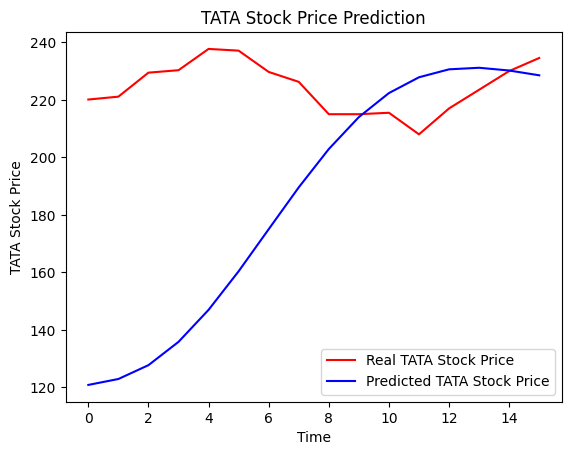

In [39]:
# Visuallising the results
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label= 'Predicted TATA Stock Price')
plt.title("TATA Stock Price Prediction")
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()